## Putting It All Together

In [1]:
import torch
import numpy as np

from torch import nn
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'device: {device}')

device: cpu


## 1. Data

In [3]:
# Create some data using the Linear Regrassion formula
weight = 0.4
bias = 0.6

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start=start, end=end, step=step).unsqueeze(dim=1) # without unsqueeze, errors will pop up
y = weight * X + bias

In [4]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=147)
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [5]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c='b', label='Train Data')

  # Plot testing data in green
  plt.scatter(test_data, test_labels, c='g', label='Test Data')

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c='r', label='Predictions')
  
  plt.legend(prop={'size': 14})

def visualize_loss(epoch_count_list, 
                   train_loss_list, 
                   test_loss_list):
  plt.figure(figsize=(10, 7))

  # Plot training loss
  plt.plot(epoch_count_list, train_loss_list, label='Train Loss')
  plt.plot(epoch_count_list, test_loss_list, label='Test Loss')
  plt.title('Train & Test Loss Curves')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(prop={'size': 14})

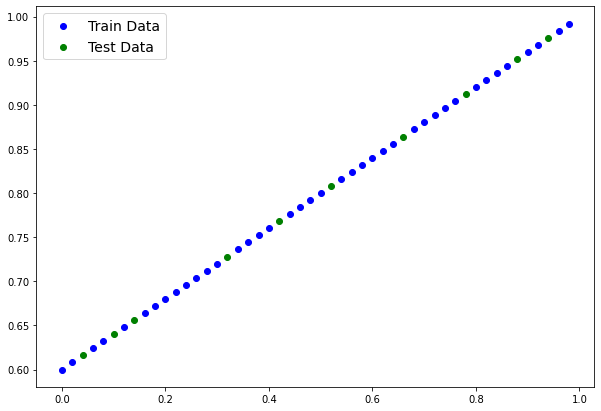

In [6]:
plot_predictions()

## 2. Building a PyTorch Linear Model

In [7]:
class LinearRegrassion(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)
  
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)
  
torch.manual_seed(42)
model = LinearRegrassion()
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

## 3. Train & Test Data

In [8]:
# For the trainig phase, we need to set up a Loss Function & Optimizer
loss_function = nn.L1Loss() # same as MAE
optimizer = torch.optim.SGD(params=model.parameters(), 
                            lr=0.01) # stochastic gradient descent

In [9]:
# Write a training loop
torch.manual_seed(42)
epochs = 150

epoch_count_ = []
train_loss_ = []
test_loss_ = []

for epoch in range(epochs):
  model.train()
  train_pred = model.forward(X_train)
  train_loss = loss_function(train_pred, y_train)
  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()

  # Testing
  model.eval()
  with torch.inference_mode():
    test_pred = model.forward(X_test)
    test_loss = loss_function(test_pred, y_test)
  
  print(f'Epoch: {epoch} | Training Loss: {train_loss} | Testing Loss: {test_loss}')
  print(model.state_dict())

  epoch_count_.append(epoch)
  train_loss_.append(train_loss)
  test_loss_.append(test_loss)

Epoch: 0 | Training Loss: 0.40954312682151794 | Testing Loss: 0.3926223814487457
OrderedDict([('linear_layer.weight', tensor([[0.7596]])), ('linear_layer.bias', tensor([0.8200]))])
Epoch: 1 | Training Loss: 0.397117555141449 | Testing Loss: 0.38025838136672974
OrderedDict([('linear_layer.weight', tensor([[0.7547]])), ('linear_layer.bias', tensor([0.8100]))])
Epoch: 2 | Training Loss: 0.38469198346138 | Testing Loss: 0.36789432168006897
OrderedDict([('linear_layer.weight', tensor([[0.7498]])), ('linear_layer.bias', tensor([0.8000]))])
Epoch: 3 | Training Loss: 0.3722664415836334 | Testing Loss: 0.35553041100502014
OrderedDict([('linear_layer.weight', tensor([[0.7448]])), ('linear_layer.bias', tensor([0.7900]))])
Epoch: 4 | Training Loss: 0.35984086990356445 | Testing Loss: 0.34316641092300415
OrderedDict([('linear_layer.weight', tensor([[0.7399]])), ('linear_layer.bias', tensor([0.7800]))])
Epoch: 5 | Training Loss: 0.3474152982234955 | Testing Loss: 0.33080238103866577
OrderedDict([('l

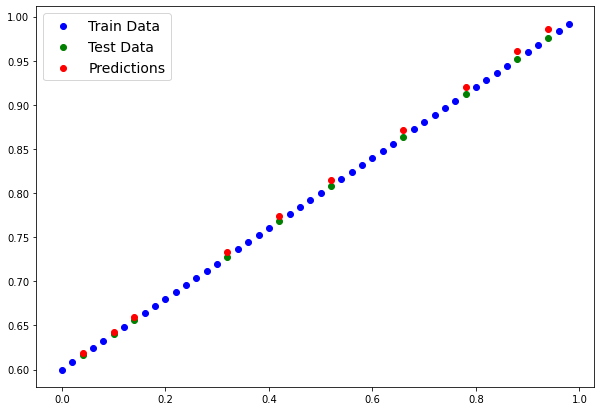

In [10]:
plot_predictions(predictions=test_pred)

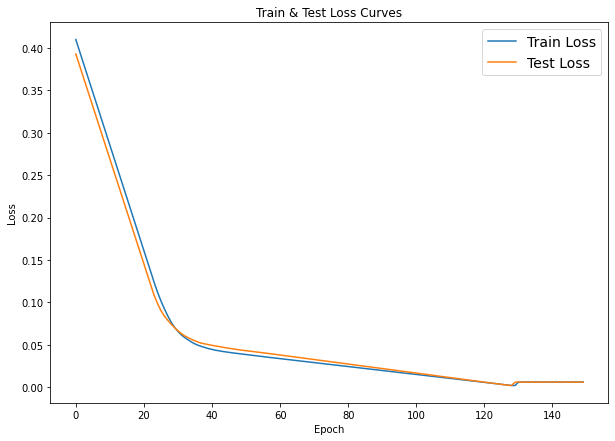

In [11]:
visualize_loss(np.array(torch.tensor(epoch_count_).numpy()), np.array(torch.tensor(train_loss_).numpy()), np.array(torch.tensor(test_loss_).numpy()))

## Saving & Loading a Trained Model

In [12]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = 'pytorch_workflow_all_together.pth'
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

# 3. Save the model state dict
torch.save(model.state_dict(), MODEL_SAVE_PATH)